In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
# Load your dataset
df = pd.read_csv("C:\\Users\\Avula Jhansy\\Downloads\\weather.csv")
description_mapping = {
    'Partly cloudy throughout the day.': 0,
    'Partly cloudy throughout the day with rain.': 1,
    'Partly cloudy throughout the day with rain clearing later.': 2,
    'Cloudy skies throughout the day.': 3,
    'Cloudy skies throughout the day with late afternoon rain.': 4,
    'Partly cloudy throughout the day with a chance of rain throughout the day.': 5,
    'Partly cloudy throughout the day with rain in the morning and afternoon.': 6,
    'Partly cloudy throughout the day with morning rain.': 7,
    'Cloudy skies throughout the day with rain clearing later.': 8,
    'Partly cloudy throughout the day with late afternoon rain.': 9,
    'Cloudy skies throughout the day with early morning rain.': 10,
    'Cloudy skies throughout the day with a chance of rain throughout the day.': 11,
    'Cloudy skies throughout the day with rain.': 12,
    'Partly cloudy throughout the day with early morning rain.': 13,
    'Partly cloudy throughout the day with afternoon rain.': 14,
    'Becoming cloudy in the afternoon with early morning rain.': 15,
    'Becoming cloudy in the afternoon.': 16,
    'Becoming cloudy in the afternoon with late afternoon rain.': 17,
    'Clear conditions throughout the day.': 18,
    'Clearing in the afternoon with a chance of rain throughout the day.': 19,
    'Clearing in the afternoon.': 20,
    'Clearing in the afternoon with morning rain.': 21,
    'Cloudy skies throughout the day with rain in the morning and afternoon.': 22,
    'Clear conditions throughout the day with rain clearing later.': 23,
    'Clear conditions throughout the day with morning rain.': 24,
    'Becoming cloudy in the afternoon with rain in the morning and afternoon.': 25,
    'Becoming cloudy in the afternoon with rain.': 26,
    'Cloudy skies throughout the day with morning rain.': 27,
    'Cloudy skies throughout the day with afternoon rain.': 28,
    'Clearing in the afternoon with rain in the morning and afternoon.': 29,
    'Clearing in the afternoon with rain.': 30,
    'Clearing in the afternoon with rain clearing later.': 31,
    'Becoming cloudy in the afternoon with rain clearing later.': 32,
    'Clear conditions throughout the day with rain.': 33,
    'Becoming cloudy in the afternoon with afternoon rain.': 34,
    'Clear conditions throughout the day with late afternoon rain.': 35,
    'Clear conditions throughout the day with afternoon rain.': 36,
    'Clear conditions throughout the day with early morning rain.': 37,
    'Clearing in the afternoon with early morning rain.': 38,
    'Becoming cloudy in the afternoon with morning rain.': 39,
    'Clearing in the afternoon with afternoon rain.': 40,
    'Clearing in the afternoon with late afternoon rain.': 41,
    'Becoming cloudy in the afternoon with a chance of rain throughout the day.': 42,
    'Clear conditions throughout the day with a chance of rain throughout the day.': 43,
    'Clear conditions throughout the day with rain in the morning and afternoon.': 44,
    'nan': -1  # Handle 'nan' value
}
label_encoder = LabelEncoder()
df['description'] = df['description'].map(description_mapping).fillna(-1)  # Use map and handle 'nan' with -1
df['datetime'] = pd.to_datetime(df['datetime'])
df['day_of_week'] = df['datetime'].dt.dayofweek
df['day_of_year'] = df['datetime'].dt.dayofyear
df['hour'] = df['datetime'].dt.hour
feature_columns = ['day_of_week', 'day_of_year', 'hour', 'temp', 'humidity', 'precip', 'windspeed']
X = df[feature_columns]
y = df['description']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_cls = XGBClassifier()
xgb_cls.fit(X_train, y_train)
y_pred = xgb_cls.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(linear_reg.score(X_test, y_test)))
print("Root Mean Squared Error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r_squared))
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)
model_svm = SVC(random_state=42) 
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_str_svm = classification_report(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('SVM Classification Report:\n', classification_report_str_svm)
model_knn = KNeighborsClassifier()  
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_str_knn = classification_report(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('KNN Classification Report:\n', classification_report_str_knn)
model_decision_tree = DecisionTreeClassifier() 
model_decision_tree.fit(X_train, y_train)
y_pred_decision_tree = model_decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
classification_report_str_decision_tree = classification_report(y_test, y_pred_decision_tree)
print(f'Decision Tree Accuracy: {accuracy_decision_tree:.2f}')
print('Decision Tree Classification Report:\n', classification_report_str_decision_tree)

C:\Users\Avula Jhansy\AppData\Local\Temp\ipykernel_10196\268657180.py:67: UserWarning: Parsing '14-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['datetime'] = pd.to_datetime(df['datetime'])
C:\Users\Avula Jhansy\AppData\Local\Temp\ipykernel_10196\268657180.py:67: UserWarning: Parsing '15-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['datetime'] = pd.to_datetime(df['datetime'])
C:\Users\Avula Jhansy\AppData\Local\Temp\ipykernel_10196\268657180.py:67: UserWarning: Parsing '16-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['datetime'] = pd.to_datetime(df['datetime'])
C:\Users\Avula Jhansy\AppData\Local\Temp\ipykernel_10196\268657180.py:67: UserWarning: Parsing '17-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['datetime'] = pd.

Accuracy: 0.743287800282619


C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.74
Accuracy: 0.02
Root Mean Squared Error: 54.27
R-squared: 0.02


C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and 

Accuracy: 0.41
Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64       787
           1       0.18      0.36      0.24       183
           2       0.00      0.00      0.00        85
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        15
           5       0.07      0.02      0.03       126
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        46
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        93
          10       0.00      0.00      0.00         7
          11       0.43      0.20      0.28        99
          12       0.00      0.00      0.00        63
          13       0.00      0.00      0.00        88
          14       0.00      0.00      0.00        81
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.0

C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.40
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.41      1.00      0.58       787
           1       0.19      0.18      0.19       183
           2       0.00      0.00      0.00        85
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00       126
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        46
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        93
          10       0.00      0.00      0.00         7
          11       0.46      0.19      0.27        99
          12       1.00      0.02      0.03        63
          13       0.00      0.00      0.00        88
          14       0.00      0.00      0.00        81
          15       0.00      0.00      0.00         1
          16       0.00      0.00 

C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Avula Jhansy\anaconda3\li

C:\Users\Avula Jhansy\AppData\Local\Temp\ipykernel_10196\99609056.py:70: UserWarning: Parsing '14-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['datetime'] = pd.to_datetime(df['datetime'])
C:\Users\Avula Jhansy\AppData\Local\Temp\ipykernel_10196\99609056.py:70: UserWarning: Parsing '15-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['datetime'] = pd.to_datetime(df['datetime'])
C:\Users\Avula Jhansy\AppData\Local\Temp\ipykernel_10196\99609056.py:70: UserWarning: Parsing '16-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['datetime'] = pd.to_datetime(df['datetime'])
C:\Users\Avula Jhansy\AppData\Local\Temp\ipykernel_10196\99609056.py:70: UserWarning: Parsing '17-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['datetime'] = pd.to_d

C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\A

C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Avula Jhansy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\A

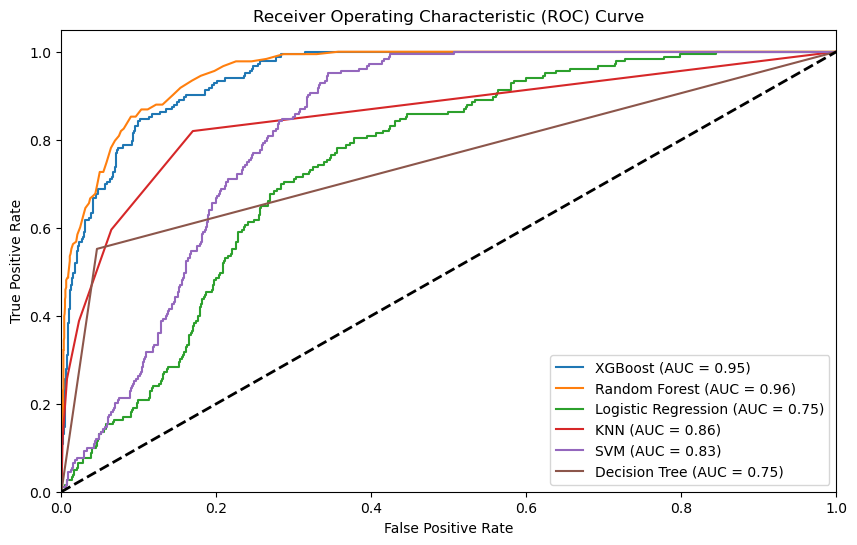

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("C:\\Users\\Avula Jhansy\\Downloads\\weather.csv")

# ... (Same preprocessing steps as before) ...

description_mapping = {
    'Partly cloudy throughout the day.': 0,
    'Partly cloudy throughout the day with rain.': 1,
    'Partly cloudy throughout the day with rain clearing later.': 2,
    'Cloudy skies throughout the day.': 3,
    'Cloudy skies throughout the day with late afternoon rain.': 4,
    'Partly cloudy throughout the day with a chance of rain throughout the day.': 5,
    'Partly cloudy throughout the day with rain in the morning and afternoon.': 6,
    'Partly cloudy throughout the day with morning rain.': 7,
    'Cloudy skies throughout the day with rain clearing later.': 8,
    'Partly cloudy throughout the day with late afternoon rain.': 9,
    'Cloudy skies throughout the day with early morning rain.': 10,
    'Cloudy skies throughout the day with a chance of rain throughout the day.': 11,
    'Cloudy skies throughout the day with rain.': 12,
    'Partly cloudy throughout the day with early morning rain.': 13,
    'Partly cloudy throughout the day with afternoon rain.': 14,
    'Becoming cloudy in the afternoon with early morning rain.': 15,
    'Becoming cloudy in the afternoon.': 16,
    'Becoming cloudy in the afternoon with late afternoon rain.': 17,
    'Clear conditions throughout the day.': 18,
    'Clearing in the afternoon with a chance of rain throughout the day.': 19,
    'Clearing in the afternoon.': 20,
    'Clearing in the afternoon with morning rain.': 21,
    'Cloudy skies throughout the day with rain in the morning and afternoon.': 22,
    'Clear conditions throughout the day with rain clearing later.': 23,
    'Clear conditions throughout the day with morning rain.': 24,
    'Becoming cloudy in the afternoon with rain in the morning and afternoon.': 25,
    'Becoming cloudy in the afternoon with rain.': 26,
    'Cloudy skies throughout the day with morning rain.': 27,
    'Cloudy skies throughout the day with afternoon rain.': 28,
    'Clearing in the afternoon with rain in the morning and afternoon.': 29,
    'Clearing in the afternoon with rain.': 30,
    'Clearing in the afternoon with rain clearing later.': 31,
    'Becoming cloudy in the afternoon with rain clearing later.': 32,
    'Clear conditions throughout the day with rain.': 33,
    'Becoming cloudy in the afternoon with afternoon rain.': 34,
    'Clear conditions throughout the day with late afternoon rain.': 35,
    'Clear conditions throughout the day with afternoon rain.': 36,
    'Clear conditions throughout the day with early morning rain.': 37,
    'Clearing in the afternoon with early morning rain.': 38,
    'Becoming cloudy in the afternoon with morning rain.': 39,
    'Clearing in the afternoon with afternoon rain.': 40,
    'Clearing in the afternoon with late afternoon rain.': 41,
    'Becoming cloudy in the afternoon with a chance of rain throughout the day.': 42,
    'Clear conditions throughout the day with a chance of rain throughout the day.': 43,
    'Clear conditions throughout the day with rain in the morning and afternoon.': 44,
    'nan': -1  # Handle 'nan' value
}
# Load your dataset
# Create a LabelEncoder
label_encoder = LabelEncoder()
# Encode the 'description' column using the mapping dictionary
df['description'] = df['description'].map(description_mapping).fillna(-1)  # Use map and handle 'nan' with -1
df['datetime'] = pd.to_datetime(df['datetime'])
# Feature Engineering (if needed)
df['day_of_week'] = df['datetime'].dt.dayofweek
df['day_of_year'] = df['datetime'].dt.dayofyear
df['hour'] = df['datetime'].dt.hour
# Specify your feature columns
feature_columns = ['day_of_week', 'day_of_year', 'hour', 'temp', 'humidity', 'precip', 'windspeed']
# Select features and target variable
X = df[feature_columns]
y = df['description']  # Updated target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier()
}

# Create dictionaries to store ROC curve data and AUC scores
roc_curves = {}
roc_auc_scores = {}

# Train classifiers and generate ROC curves for each class
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)
    
    n_classes = len(df['description'].unique())
    
    # Initialize variables to store ROC curve data and AUC scores
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Store ROC curve data and AUC scores for each class
    roc_curves[name] = (fpr, tpr)
    roc_auc_scores[name] = roc_auc

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 6))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr[1], tpr[1], label=f'{name} (AUC = {roc_auc_scores[name][1]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
